In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('updated.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df1 = df.copy()

In [6]:
df1[df1['workclass']=='?']

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
# replacing ? with NA values
df1['workclass'].replace('?',np.nan,inplace=True)
df1['occupation'].replace('?',np.nan,inplace=True)

In [13]:
df1.isna().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
education-num       0
marital             0
occupation       1843
relationship        0
race                0
sex                 0
capital             0
capital.1           0
hours               0
country             0
salary              0
dtype: int64

## Checking 3 approaches to handle missing values
- Dropping NA VALUE
- Random sample imputation

### Dropping NA VALUE

In [16]:
df2 = df1.copy()

In [19]:
cols = ['workclass','occupation']

In [20]:
new_df = df2[cols].dropna()

In [23]:
new_df.isna().sum()

workclass     0
occupation    0
dtype: int64

<AxesSubplot:>

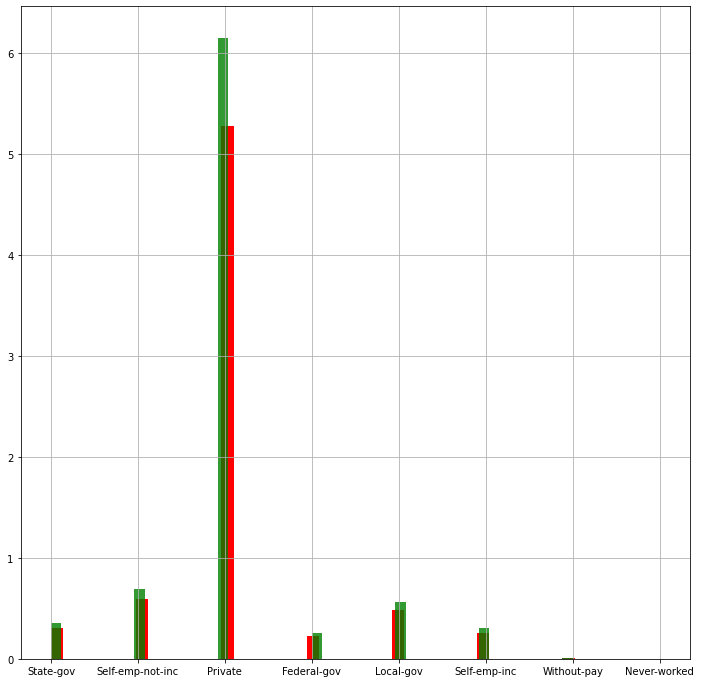

In [24]:
 # Checking Impact of dropna via histograms on workclass column
fig= plt.figure()
ax = fig.add_subplot(111)

df2['workclass'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
new_df['workclass'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green', alpha=0.8)

<AxesSubplot:>

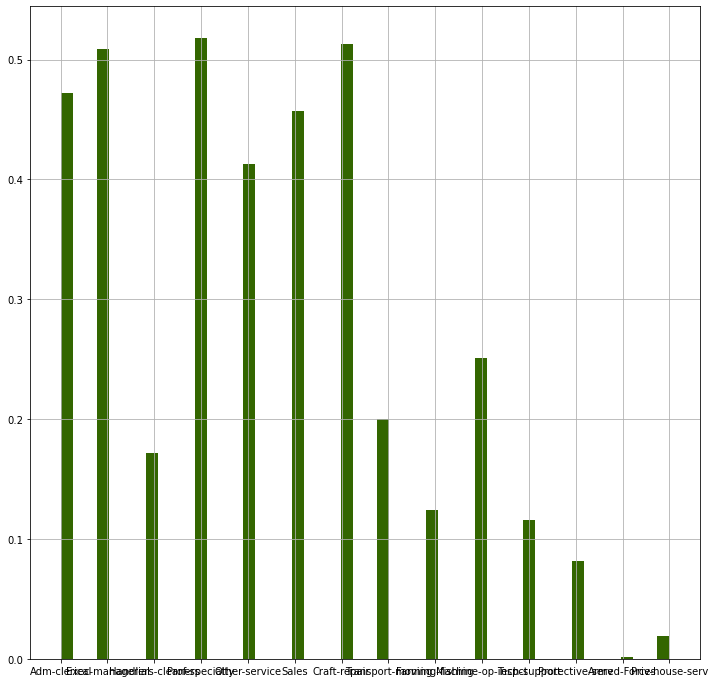

In [25]:
 # Checking Impact of dropna via histograms on occupation column
fig= plt.figure()
ax = fig.add_subplot(111)

df2['occupation'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
new_df['occupation'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green', alpha=0.8)

In [27]:
temp = pd.concat([
    # % of observations per category, original data 
    df2['workclass'].value_counts()/len(df2),
    # % of observations per category, cca data 
    df2['workclass'].value_counts()/len(new_df)
],axis=1)

temp.columns=['original','cca']
temp

,original,cca
Private,0.697030,0.738850
Self-emp-not-inc,0.078038,0.082720
Local-gov,0.064279,0.068136
State-gov,0.039864,0.042255
Self-emp-inc,0.034274,0.036330
Federal-gov,0.029483,0.031252
Without-pay,0.000430,0.000456
Never-worked,0.000215,0.000228


## Random sample imputation

In [29]:
df1.isnull().mean()*100

age              0.000000
workclass        5.638647
fnlwgt           0.000000
education        0.000000
education-num    0.000000
marital          0.000000
occupation       5.660146
relationship     0.000000
race             0.000000
sex              0.000000
capital          0.000000
capital.1        0.000000
hours            0.000000
country          0.000000
salary           0.000000
dtype: float64

<AxesSubplot:>

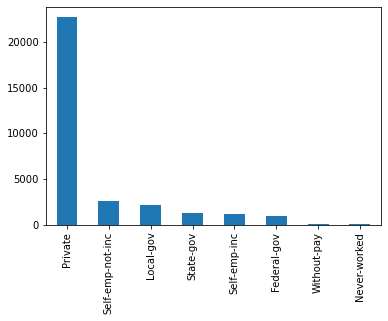

In [31]:
df1['workclass'].value_counts().sort_values(ascending=False).plot.bar()

In [32]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital', 'capital.1',
       'hours', 'country', 'salary'],
      dtype='object')

In [33]:
df1['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [36]:
df3 = df1.copy()

In [37]:
X = df3.drop(columns=['salary'])
y = df3['salary']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [39]:
X_train['workclass_imputed'] = X_train['workclass']
X_test['workclass_imputed'] = X_test['workclass']

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/1636797421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['workclass_imputed'] = X_train['workclass']
C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/1636797421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['workclass_imputed'] = X_test['workclass']


In [41]:
X_train['workclass_imputed'][X_train['workclass_imputed'].isnull()]

25044    NaN
28043    NaN
19509    NaN
30412    NaN
8057     NaN
        ... 
19775    NaN
32542    NaN
27698    NaN
25902    NaN
23333    NaN
Name: workclass_imputed, Length: 1481, dtype: object

In [42]:
X_train['workclass_imputed'].dropna().sample(X_train['workclass'].isnull().sum())

3114              Private
26139             Private
21300             Private
18029    Self-emp-not-inc
5279         Self-emp-inc
               ...       
20211             Private
24947             Private
25811           Local-gov
1964              Private
10907             Private
Name: workclass_imputed, Length: 1481, dtype: object

In [43]:
# random inputation of workclass
X_train['workclass_imputed'][X_train['workclass_imputed'].isnull()]= X_train['workclass'].dropna().sample(X_train['workclass'].isnull().sum()).values
X_test['workclass_imputed'][X_test['workclass_imputed'].isnull()]= X_test['workclass'].dropna().sample(X_test['workclass'].isnull().sum()).values

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/1971125243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['workclass_imputed'][X_train['workclass_imputed'].isnull()]= X_train['workclass'].dropna().sample(X_train['workclass'].isnull().sum()).values
C:\Users\SatyAnshu\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/1971125243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [45]:
X_train['occupation_imputed'] = X_train['occupation']
X_test['occupation_imputed'] = X_test['occupation']

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/2407159800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['occupation_imputed'] = X_train['occupation']
C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/2407159800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['occupation_imputed'] = X_test['occupation']


In [46]:
# random inputation of occupation
X_train['occupation_imputed'][X_train['occupation_imputed'].isnull()]= X_train['occupation'].dropna().sample(X_train['occupation'].isnull().sum()).values
X_test['occupation_imputed'][X_test['occupation_imputed'].isnull()]= X_test['occupation'].dropna().sample(X_test['occupation'].isnull().sum()).values

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/3484918350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['occupation_imputed'][X_train['occupation_imputed'].isnull()]= X_train['occupation'].dropna().sample(X_train['occupation'].isnull().sum()).values
C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/3484918350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['occupation_imputed'][X_test['occupation_imputed'].isnull()]= X_test['occupation'].dropna().sample(X_test['occupation'].isnull().sum()).values


In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      30725 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education-num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     30718 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital        32561 non-null  int64 
 11  capital.1      32561 non-null  int64 
 12  hours          32561 non-null  int64 
 13  country        32561 non-null  object
 14  salary         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
## Handling Classes missing values

In [53]:
df3['workclass_imputed'] = df3['workclass']

In [55]:
df3['workclass_imputed'][df3['workclass_imputed'].isnull()]= df3['workclass'].dropna().sample(df3['workclass'].isnull().sum()).values

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/683834190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['workclass_imputed'][df3['workclass_imputed'].isnull()]= df3['workclass'].dropna().sample(df3['workclass'].isnull().sum()).values


In [57]:
df3['occupation_imputed'] = df3['occupation']

In [58]:
df3['occupation_imputed'][df3['occupation_imputed'].isnull()]= df3['occupation'].dropna().sample(df3['occupation'].isnull().sum()).values

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_4556/896862936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['occupation_imputed'][df3['occupation_imputed'].isnull()]= df3['occupation'].dropna().sample(df3['occupation'].isnull().sum()).values


In [60]:
df3.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education-num            0
marital                  0
occupation            1843
relationship             0
race                     0
sex                      0
capital                  0
capital.1                0
hours                    0
country                  0
salary                   0
workclass_imputed        0
occupation_imputed       0
dtype: int64

In [61]:
df3.drop(columns=['workclass','occupation'], axis=1, inplace = True)

In [62]:
df3.isnull().sum()

age                   0
fnlwgt                0
education             0
education-num         0
marital               0
relationship          0
race                  0
sex                   0
capital               0
capital.1             0
hours                 0
country               0
salary                0
workclass_imputed     0
occupation_imputed    0
dtype: int64

In [63]:
df3.rename(columns={'workclass_imputed':'workclass','occupation_imputed':'occupation'}, inplace = True)

In [65]:
df3.isnull().sum()

age              0
fnlwgt           0
education        0
education-num    0
marital          0
relationship     0
race             0
sex              0
capital          0
capital.1        0
hours            0
country          0
salary           0
workclass        0
occupation       0
dtype: int64

In [68]:
# saving csv file
df3.to_csv('adult_updated.csv')